<a href="https://colab.research.google.com/github/axleer/Math/blob/master/ML/Gym/GDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal

Training a complex sin and cos function.

It looks like: $y = \sin^2(x) + cos(x)$


In [222]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Data

You will get 500 nums in [0, 10] as input and its targets.

In this step, I enlarge its targets ten times.

In [223]:
x = torch.tensor(np.arange(0, 10, 0.02), dtype=torch.float).view(500, 1)
y = (torch.pow(torch.sin(x), 2.0) + torch.cos(x * 2)) * 10

## Model

I choose the `Tanh` as the activation function in the two hidden layers.

And use a GDM optimizer with slow lr and high momentum to train my model.

In [224]:
model = nn.Sequential(
    nn.Linear(1, 20),
    nn.Tanh(),
    nn.Linear(20, 20),
    nn.Tanh(),
    nn.Linear(20, 1),
)

optim = torch.optim.SGD(model.parameters(), lr=5 * 1e-4, momentum=0.95)
mse = nn.MSELoss()

## Result

You see with about 5000 times optimizations the model preform fairly well.

I haven't see other strategy to let it preform better.

In [225]:
error = []

for i in range(5000):
    predict = model(x)
    loss = mse(predict, y)
    error.append(loss.item())
    optim.zero_grad()
    loss.backward()
    optim.step()

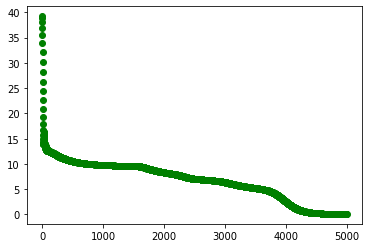

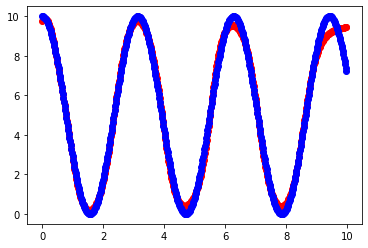

In [228]:
%matplotlib inline
plt.scatter(np.arange(5000), error, c='green')
plt.show()
plt.scatter(x.numpy(), model(x).detach().numpy(), c='red')
plt.scatter(x.numpy(), y.numpy(), c='blue')
plt.show()